# Covid19 propagation

## Introduction 

This project is aimed on descriptive analysis of the epidemic of coronavirus in Russia. The idea is to compare international experience of fighting pandemic and Russian approaches through data visualization and modelize possible scenaraio for Russia in case of complete dequarantine on the first June. The dataset used: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

## Limitations 

The test strategy is not clear, some countries perform many tests but in the same time testing same people for several times. In some countries tests are proactive, meanwhile in others tests are conducted only for people who are seeking for the medical help.
 Thus, in some countries many people with corona might not pe reported, yet, in the same time these are probably the countries which have the highest lethal rate since only sever cases are reported.

## Data exploration 

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61


In [18]:
Russia = df[df['Country/Region']=='Russia']
Russia = Russia.T[4:]
Russia.index = pd.to_datetime(Russia.index)

In [19]:
Germany = df[df['Country/Region']=='Germany']
Germany = Germany.T[4:]
Germany.index = pd.to_datetime(Germany.index)
France = df[df['Country/Region']=='France']
France = France[France['Province/State'].isna()]
France = France.T[4:]
France.index = pd.to_datetime(France.index)

In [20]:
Russia.columns = ['Cases']
Russia.head()

,Cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [21]:
Germany.columns = ['Cases']
Germany.head()

,Cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [22]:
France.columns = ['Cases']
France.head()

,Cases
2020-01-22,0
2020-01-23,0
2020-01-24,2
2020-01-25,3
2020-01-26,3


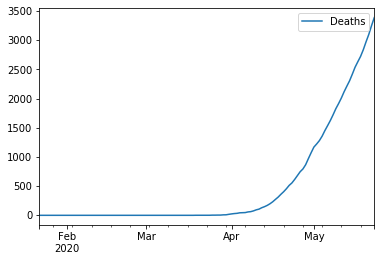

In [23]:
df = pd.read_csv('time_series_covid19_deaths_global.csv')
Russia_deaths = df[df['Country/Region']=='Russia']
Russia_deaths = Russia_deaths.T[4:]
Russia_deaths.index = pd.to_datetime(Russia_deaths.index)
Russia_deaths.columns = ['Deaths']
Russia_deaths.head()
Russia_deaths.plot()

In [24]:
Germany_deaths = df[df['Country/Region']=='Germany']
Germany_deaths = Germany_deaths.T[4:]
Germany_deaths.index = pd.to_datetime(Germany_deaths.index)
Germany_deaths.columns = ['Deaths']
Germany_deaths.head()

,Deaths
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [25]:
France_death = df[df['Country/Region']=='France']
France_death = France_death[France_death['Province/State'].isna()]
France_death = France_death.T[4:]
France_death.index = pd.to_datetime(France_death.index)
France_death.columns = ['Deaths']
France_death.head()

,Deaths
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [26]:
Russia = Russia.join(Russia_deaths)
Germany = Germany.join(Germany_deaths)
France = France.join(France_death)

In [27]:
df = pd.read_csv('time_series_covid19_recovered_global.csv')
Russia_recovered = df[df['Country/Region']=='Russia']
Russia_recovered = Russia_recovered.T[4:]
Russia_recovered.index = pd.to_datetime(Russia_recovered.index)
Russia_recovered.columns = ['Recovered']
Russia_recovered.head()

,Recovered
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [28]:
Germany_recovered = df[df['Country/Region']=='Germany']
Germany_recovered = Germany_recovered.T[4:]
Germany_recovered.index = pd.to_datetime(Germany_recovered.index)
Germany_recovered.columns = ['Recovered']
Germany_recovered.head()

,Recovered
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [29]:
France_recovered = df[df['Country/Region']=='France']
France_recovered = France_recovered[France_recovered['Province/State'].isna()]
France_recovered = France_recovered.T[4:]
France_recovered.index = pd.to_datetime(France_recovered.index)
France_recovered.columns = ['Recovered']
France_recovered.head()

,Recovered
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


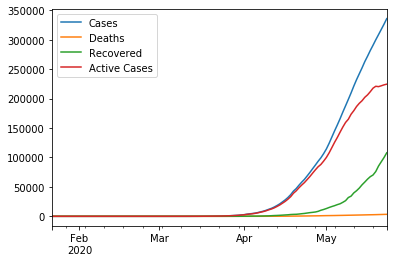

In [30]:
Russia = Russia.join(Russia_recovered)
Russia['Active Cases'] = Russia['Cases'] - Russia['Deaths'] - Russia['Recovered']
Russia.plot()
plt.show()

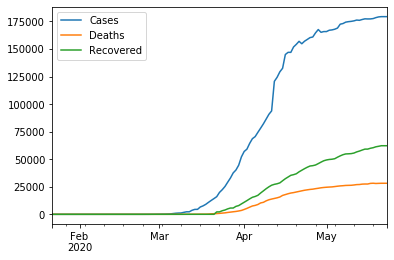

In [31]:
Germany = Germany.join(Germany_recovered)
France = France.join(France_recovered)
France.plot()

In [32]:
Russia['Infected'] = Russia['Active Cases'].shift(-6)
for i in Russia.columns:
    Russia[i] = pd.to_numeric(Russia[i],downcast='float')
Russia.head()

,Cases,Deaths,Recovered,Active Cases,Infected
2020-01-22,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,2.0
2020-01-26,0.0,0.0,0.0,0.0,2.0


In [33]:
Germany['Active Cases'] = Germany['Cases'] - Germany['Deaths'] - Germany['Recovered']
Germany['Infected'] = Germany['Active Cases'].shift(-6)
for i in Germany.columns:
    Germany[i] = pd.to_numeric(Germany[i],downcast='float')
Germany.head()

,Cases,Deaths,Recovered,Active Cases,Infected
2020-01-22,0.0,0.0,0.0,0.0,4.0
2020-01-23,0.0,0.0,0.0,0.0,4.0
2020-01-24,0.0,0.0,0.0,0.0,4.0
2020-01-25,0.0,0.0,0.0,0.0,5.0
2020-01-26,0.0,0.0,0.0,0.0,8.0


In [34]:
France['Active Cases'] = France['Cases'] - France['Deaths'] - France['Recovered']
France['Infected'] = France['Active Cases'].shift(-6)
for i in France.columns:
    France[i] = pd.to_numeric(France[i],downcast='float')
France.head()

,Cases,Deaths,Recovered,Active Cases,Infected
2020-01-22,0.0,0.0,0.0,0.0,4.0
2020-01-23,0.0,0.0,0.0,0.0,5.0
2020-01-24,2.0,0.0,0.0,2.0,5.0
2020-01-25,3.0,0.0,0.0,3.0,5.0
2020-01-26,3.0,0.0,0.0,3.0,6.0


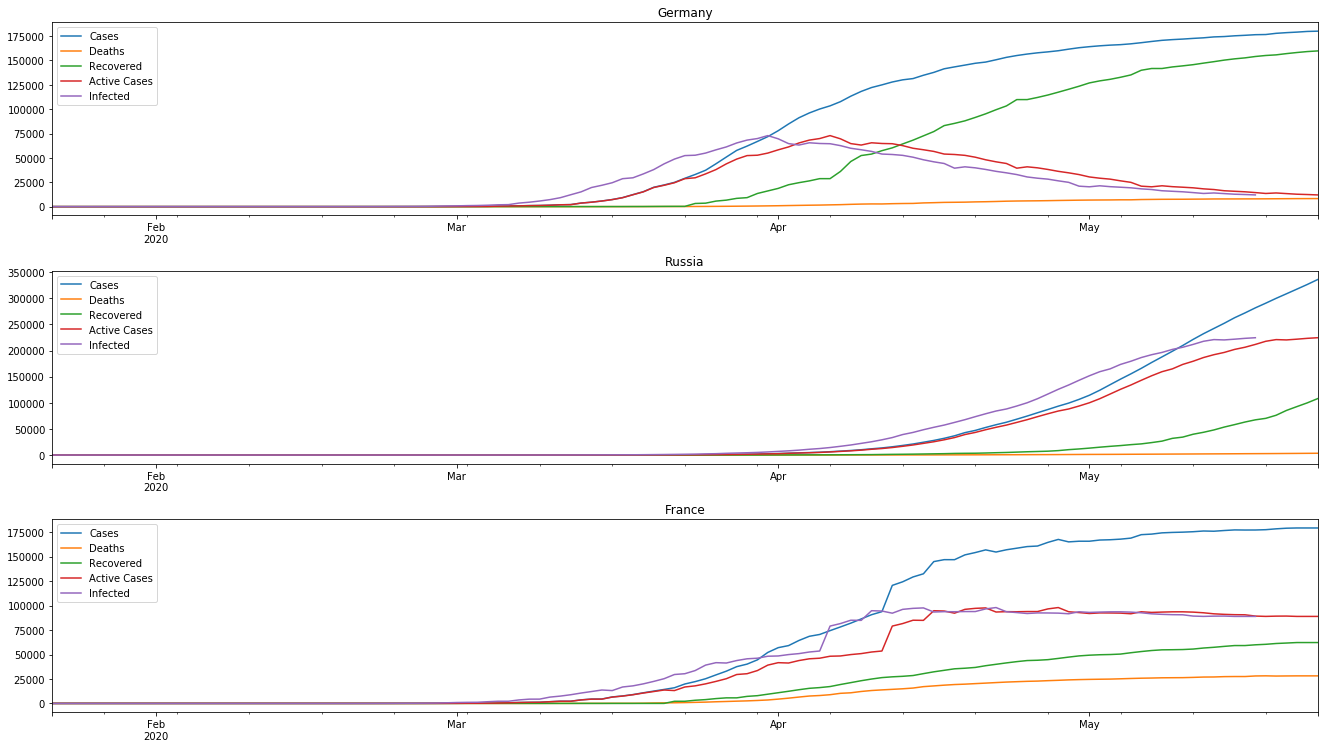

In [35]:
fig, (ax1,ax2, ax3) = plt.subplots(3,1)
fig.set_size_inches(18.5, 10.5)
Germany.plot(ax = ax1)
Russia.plot(ax = ax2)
France.plot(ax = ax3)
ax1.set_title("Germany")
ax2.set_title("Russia")
ax3.set_title('France')
fig.tight_layout()
plt.show()

## Explanation visualization and descriptive statistics

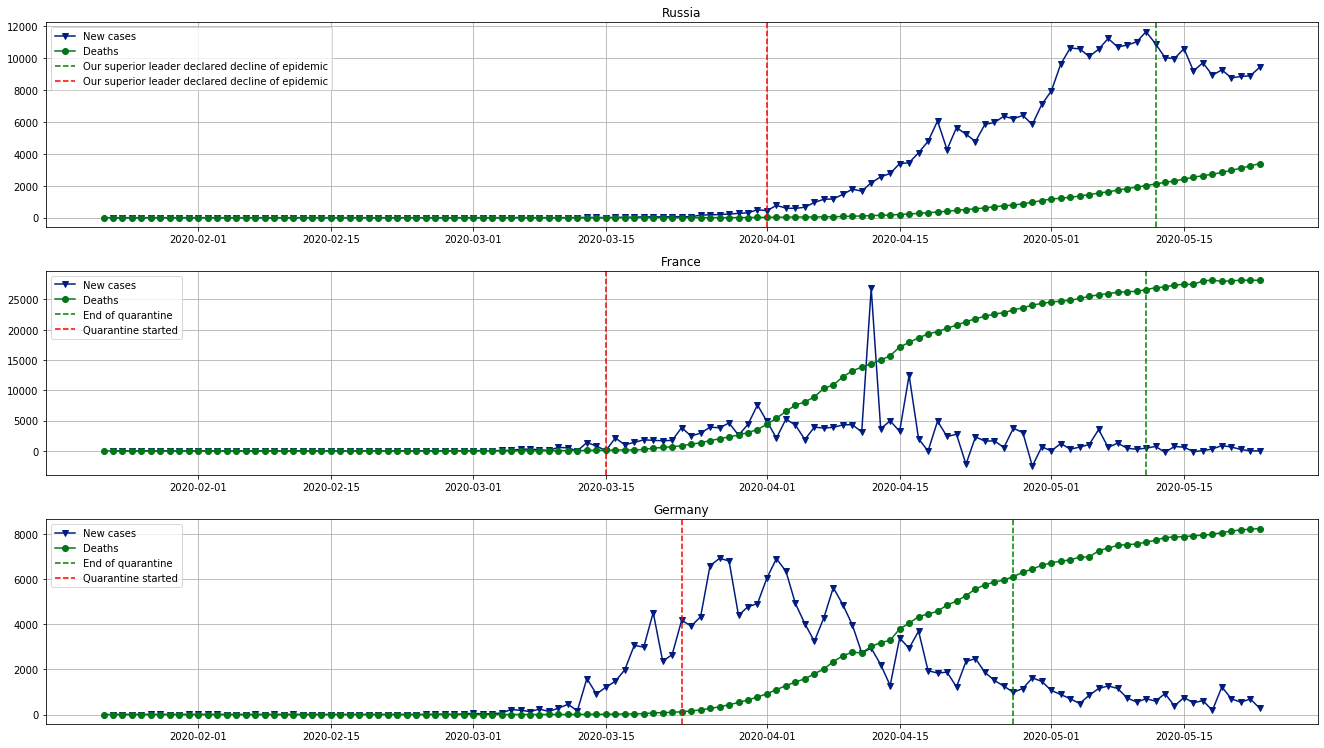

In [37]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(18.5, 10.5)
ax1.plot(Russia.index,Russia['Cases'].diff(),label = 'New cases', marker = 'v')
ax1.plot(Russia.index, Russia['Deaths'], label = 'Deaths', marker = 'o')
ax1.axvline(x = pd.to_datetime('2020-05-12'), label = 'Announce of the dequarantine',linestyle='--', color = 'g')
ax1.axvline(x = pd.to_datetime('2020-04-01'), label = 'Quarantine started',linestyle='--', color = 'r')
ax1.set_title('Russia')
ax2.set_title('France')
ax3.set_title('Germany')
ax1.legend()
ax2.plot(France['Cases'].diff(),label = 'New cases',marker = 'v')
ax2.plot(France['Deaths'],label = 'Deaths',marker = 'o')
ax2.axvline(x = pd.to_datetime('2020-05-11'), label = 'Announce of the dequarantine',linestyle='--', color = 'g')
ax2.axvline(x = pd.to_datetime('2020-03-15'), label = 'Quarantine started',linestyle='--', color = 'r')
ax2.legend()
ax3.plot(Germany['Cases'].diff(),label = 'New cases', marker = 'v')
ax3.plot(Germany['Deaths'],label = 'Deaths', marker = 'o')
ax3.axvline(x = pd.to_datetime('2020-04-27'), label = 'Announce of the dequarantine',linestyle='--', color = 'g')
ax3.axvline(x = pd.to_datetime('2020-03-23'), label = 'Quarantine started',linestyle='--', color = 'r')
ax1.grid()
ax2.grid()
ax3.grid()
plt.legend(loc='upper left')
plt.style.use('seaborn-dark-palette')
fig.tight_layout()
plt.show()

What do we see from this visualization? We can see that epidemic has started much later in Russia than in European countries. The quarantine in Russia was almost as short as in Germany, yet, surprisingly Russia announce the dequarantine much earlier, the number of new cases is still high, however the lethality rate is significantly lower than in Germany and France. There could be several explanations for such phenomenon: 1) Russia is successive in proactive testing 2) Russia successfully used time lag difference to prepare the health system 3) Many cases went out of statistics due to administrative issues 4) Russia has announced dequarantine in advance, yet the authorities are not going to soften the measures next days.

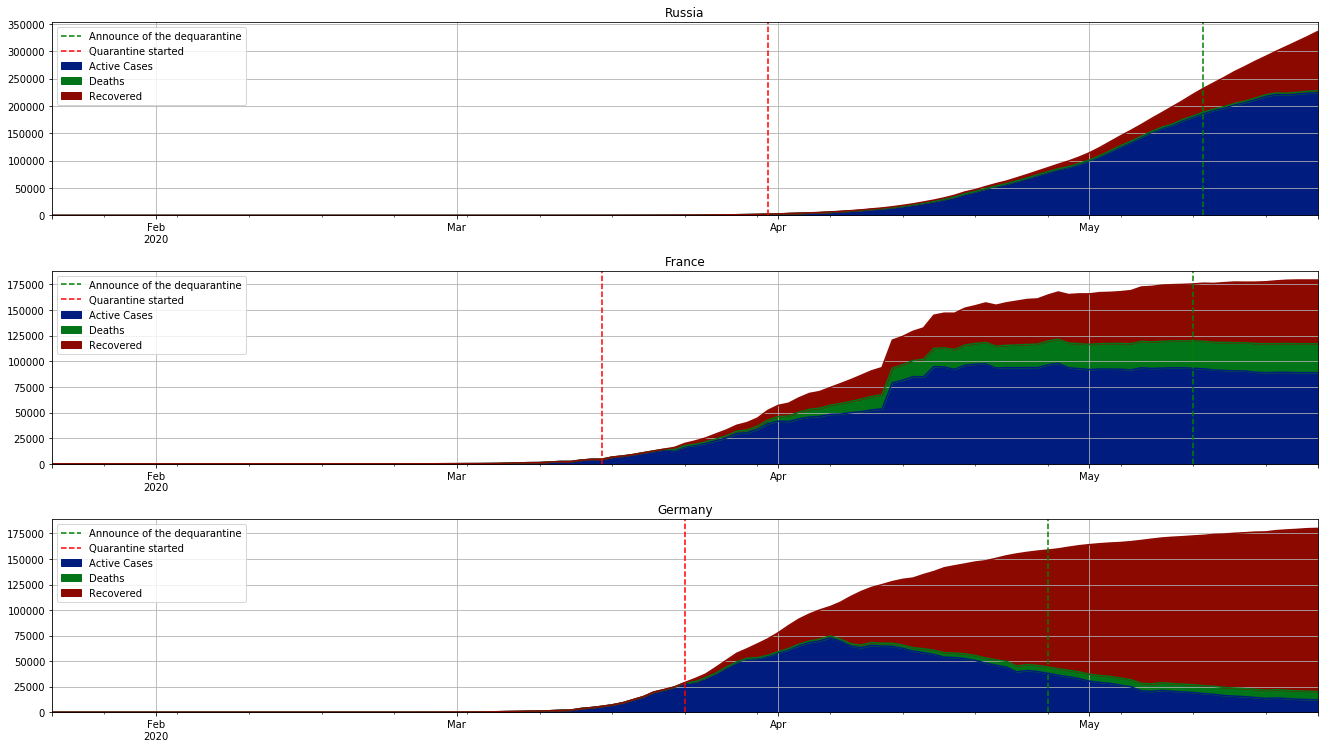

In [38]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(18.5, 10.5)
Russia[['Active Cases', 'Deaths', 'Recovered']].plot.area(ax = ax1)
France[['Active Cases', 'Deaths', 'Recovered']].plot.area(ax = ax2)
Germany[['Active Cases', 'Deaths', 'Recovered']].plot.area(ax = ax3)
ax1.axvline(x = '2020-05-12', label = 'Announce of the dequarantine',linestyle='--', color = 'g')
ax1.axvline(x = '2020-03-31', label = 'Quarantine started',linestyle='--', color = 'r')
ax1.set_title('Russia')
ax2.set_title('France')
ax3.set_title('Germany')
ax1.legend()
ax2.axvline(x = '2020-05-11', label = 'Announce of the dequarantine',linestyle='--', color = 'g')
ax2.axvline(x = '2020-03-15', label = 'Quarantine started',linestyle='--', color = 'r')
ax2.legend()
ax3.axvline(x = '2020-04-27', label = 'Announce of the dequarantine',linestyle='--', color = 'g')
ax3.axvline(x = '2020-03-23', label = 'Quarantine started',linestyle='--', color = 'r')
ax3.legend()
fig.tight_layout()
ax1.grid()
ax2.grid()
ax3.grid()
plt.legend(loc='upper left')
plt.style.use('seaborn-dark-palette')
plt.show()

This visualization provides us with the cumulative cases visualization with dynamic daily changes in the status of the cases (Active/Dead/Recovered) here the difference is even more dramatic. Russian lethal rate of corona is much lower than German of French. The number of cases, however has strong growth, yet the number of active cases change the dynamic of the growth. There are more and more people recovered.  Nevertheless, we can see that the quarantine measures were more efficient in Germany and France, the number of total cases started to converge to some certain number and the number of active cases is declining.

## Predictive analytics

To consider possible problems of dequarantine we are going to use predictive analytics models to forecast possible outcomes for Russia with different scenarios.

### Data preparation 

In [40]:
Russia_second_phase = Russia[Russia['Cases']>20]
Russia_second_phase = Russia_second_phase[Russia_second_phase.index<'2020-04-01'] # average incubation period
Russia_quarantine = Russia[Russia.index>='2020-04-06']

### Data augmentation

To train a predictive model it is important to have enough observations, unfortunately it is not our case. To deal with this problem we increased the frequency and then interpolate the missing values, then we can build and train the model.

In [41]:
Russia_augmented = Russia.asfreq('H')
Russia_augmented.head()

,Cases,Deaths,Recovered,Active Cases,Infected
2020-01-22 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-22 01:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-22 02:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-22 03:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-22 04:00:00,NaN,NaN,NaN,NaN,NaN


In [42]:
Russia_augmented = Russia_augmented.interpolate()
Russia_augmented.head()

,Cases,Deaths,Recovered,Active Cases,Infected
2020-01-22 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-22 01:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-22 02:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-22 03:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-22 04:00:00,0.0,0.0,0.0,0.0,0.0


We consider the start of epidemic after 100 confirmed cases 

In [43]:
Second_phase = Russia_augmented[Russia_augmented['Cases']>=100]
Second_phase = Second_phase[Second_phase.index<'2020-04-01']
Second_phase.head()

,Cases,Deaths,Recovered,Active Cases,Infected
2020-03-16 10:00:00,100.0,0.0,8.0,92.0,379.583344
2020-03-16 11:00:00,101.0,0.0,8.0,93.0,382.541656
2020-03-16 12:00:00,102.0,0.0,8.0,94.0,385.500000
2020-03-16 13:00:00,103.0,0.0,8.0,95.0,388.458344
2020-03-16 14:00:00,104.0,0.0,8.0,96.0,391.416656


We used augmented dickey fuller test to check the stationarity of the series 

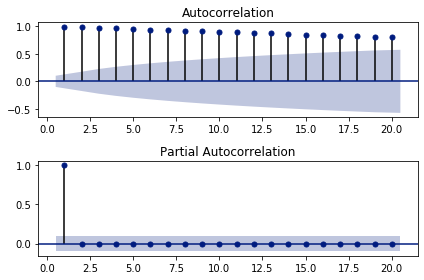

p value: 0.9984002799583648


In [44]:
from statsmodels.tsa.stattools import adfuller
x = Second_phase['Active Cases']
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

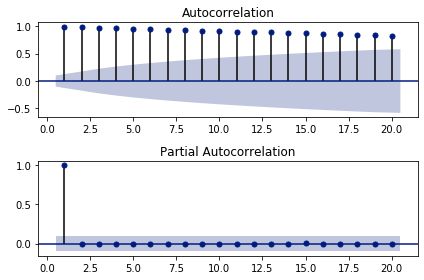

p value: 0.9216955544957688


In [45]:
# first time diff
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

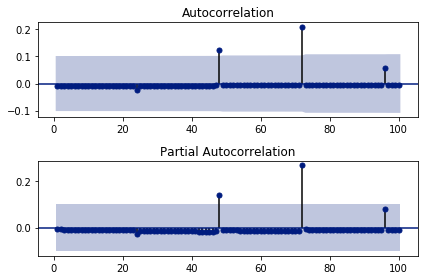

p value: 0.0


In [46]:
# second time diff
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 100, zero = False)
plot_pacf(x, ax = ax2, lags = 100, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

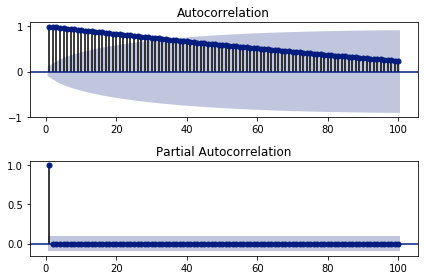

p value: 0.4534803805954198


In [47]:
#Log transformation
x = np.log(Second_phase['Active Cases'])
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 100, zero = False)
plot_pacf(x, ax = ax2, lags = 100, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

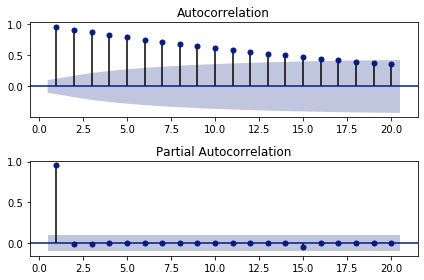

p value: 0.06260132087467174


In [48]:
# first order diff for log
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

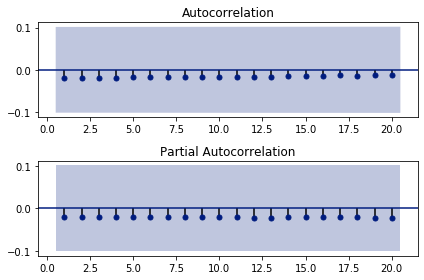

p value: 0.0


In [49]:
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

Logarithmic transformation and first order differencing gave clear stationary series, we have autoregressive model of order 1, if we continue to perform differencing we receive white noise.

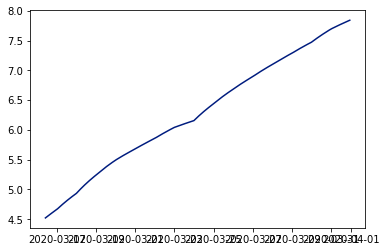

In [52]:
log_russia = np.log(Second_phase['Active Cases'])
plt.plot(log_russia)

                               SARIMAX Results                                
Dep. Variable:           Active Cases   No. Observations:                  374
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2222.743
Date:                Sun, 24 May 2020   AIC                          -4439.485
Time:                        16:49:04   BIC                          -4427.720
Sample:                    03-16-2020   HQIC                         -4434.813
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.959      0.050   -1.36e-07       0.001
ar.L1          0.9579      0.019     49.634      0.000       0.920       0.996
sigma2      3.816e-07   9.45e-09     40.368      0.0

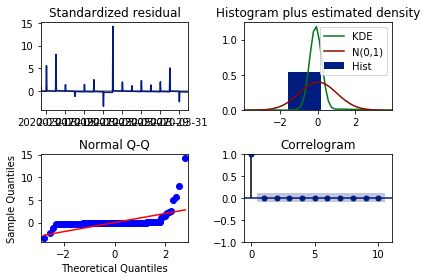

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(log_russia, order = (1,1,0), trend = 'c')
result = model.fit()
print(result.summary())
result.plot_diagnostics()
plt.tight_layout()
plt.show()

The residuals are not correlated to each other, however they are also not normally distributed. However, let’s see how our model would perform with out of the sample data.

In [92]:
forecast = result.get_prediction(start=-96,dynamic=True)
mean_forecast = forecast.predicted_mean
conf = np.exp(forecast.conf_int())

In [93]:
x = np.exp(mean_forecast)
x = pd.DataFrame(x)
y = pd.DataFrame(conf)
x = x.join(y)
x.columns = ['Prediction mean', 'Low limit', 'Up limit']
prediction = Russia_second_phase.join(x, how = 'inner')
prediction['Prediction mean'] = prediction['Prediction mean']
prediction['MAE'] = abs(prediction['Prediction mean']-prediction['Active Cases'])
prediction.describe()

,Cases,Deaths,Recovered,Active Cases,Infected,Prediction mean,Low limit,Up limit,MAE
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1742.750000,9.500000,75.000000,1658.250000,4767.000000,1680.287850,1509.470495,1878.831487,22.037850
std,459.929962,5.446712,31.591139,424.858704,885.182861,438.993490,277.562409,633.669095,20.769864
min,1264.000000,4.000000,49.000000,1211.000000,3834.000000,1211.120179,1209.654727,1212.587406,0.120179
25%,1466.500000,7.000000,60.250000,1399.250000,4224.750000,1408.265652,1339.998279,1480.977007,9.015652
50%,1685.000000,8.500000,65.000000,1611.500000,4672.000000,1641.521005,1487.076557,1813.914406,19.985011
75%,1961.250000,11.000000,79.750000,1870.500000,5214.250000,1913.543202,1656.548772,2211.768886,33.007208
max,2337.000000,17.000000,121.000000,2199.000000,5890.000000,2226.989211,1854.074138,2674.909728,48.061199


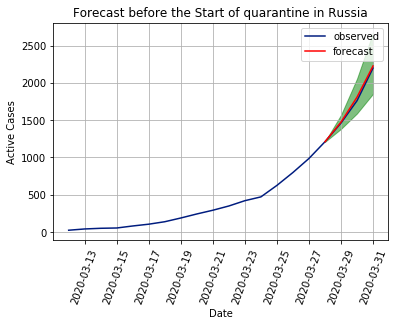

In [94]:

plt.plot(Russia_second_phase.index, Russia_second_phase['Active Cases'], label='observed')

# plot your mean forecast
plt.plot(prediction.index, prediction['Prediction mean'], color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(prediction.index, prediction['Low limit'], 
         prediction['Up limit'], color='green',alpha = .5)

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation = '70')
plt.grid()
plt.title('Forecast before the Start of quarantine in Russia')
plt.legend()
plt.show()

The fit is good, our model almost perfectly predicts out of the sample data. So, we are going to stick this as forecasting model during non-quarantine.

In [95]:
non_quarant = result

In [58]:
#same approach as befor, but we cut the data from the bottom
Russia_quarantine_aug = Russia_quarantine.asfreq('H')
Russia_quarantine_aug = Russia_quarantine_aug.interpolate()[505:]
Russia_quarantine_aug.describe()

,Cases,Deaths,Recovered,Active Cases,Infected
count,624.000000,624.000000,624.000000,624.000000,624.000000
mean,209128.406250,1971.886230,42643.738281,164512.765625,194306.750000
std,75833.585938,728.617371,28779.068359,47702.898438,33034.558594
min,87414.125000,797.041687,7392.250000,79224.835938,117145.039062
25%,140308.156250,1320.374969,17412.499512,121575.279297,169466.683594
50%,209930.835938,1916.958313,34420.478516,173593.398438,206452.664062
75%,276998.632812,2584.979187,65313.323242,209100.332031,223978.332031
max,335882.000000,3388.000000,107936.000000,224558.000000,224558.000000


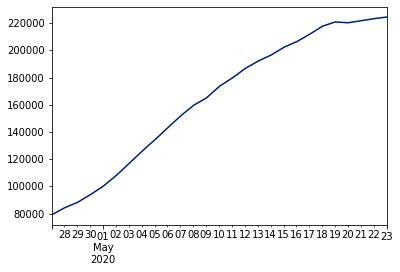

In [59]:
Russia_quarantine_aug['Active Cases'].plot()
plt.show()

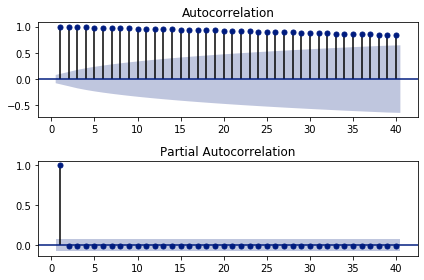

p value: 0.1877242436478933


In [66]:
x = Russia_quarantine_aug['Active Cases']
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 40, zero = False)
plot_pacf(x, ax = ax2, lags = 40, zero = False)
fig.tight_layout()
plt.show()
print('p value:',adfuller(x)[1])

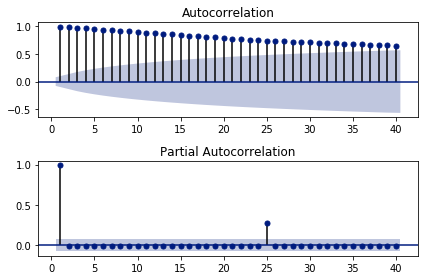

p value: 0.6819322281025815


In [67]:
# first order diff
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 40, zero = False)
plot_pacf(x, ax = ax2, lags = 40, zero = False)
fig.tight_layout()
plt.show()
print('p value:',float(adfuller(x)[1]))

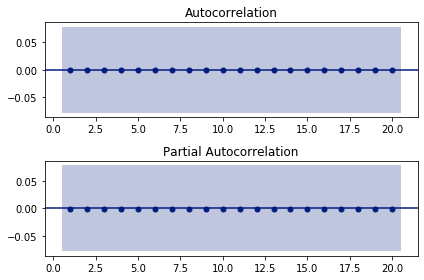

p value: 0.000000


In [62]:
# Second order diff
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',"{:f}".format(float(adfuller(x)[1])))

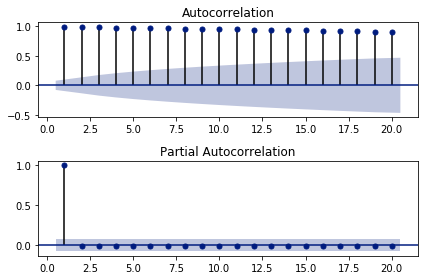

p value: 0.138869


In [63]:
x =  np.log(Russia_quarantine_aug['Active Cases'])
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',"{:f}".format(float(adfuller(x)[1])))

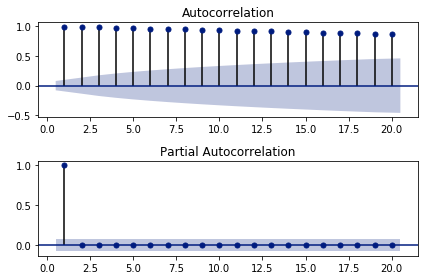

p value: 0.790472


In [64]:
# first order diff
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',"{:f}".format(float(adfuller(x)[1])))

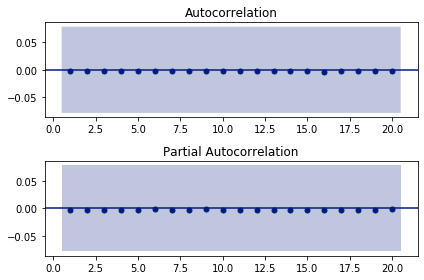

p value: 0.000000


In [65]:
# second order diff
x = x.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2,1)
plot_acf(x, ax = ax1, lags = 20, zero = False)
plot_pacf(x, ax = ax2, lags = 20, zero = False)
fig.tight_layout()
plt.show()
print('p value:',"{:f}".format(float(adfuller(x)[1])))

The choice here is not as obvious as before, neither the logarithmic no differencing transformation gave us appropriate stationary series, however we can see that after the first order differencing the acf function tails out a little bit faster, so, let’s check both logarithmic and simple differencing with our data.

C:\Users\eldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:           Active Cases   No. Observations:                  624
Model:               SARIMAX(1, 1, 0)   Log Likelihood                4926.769
Date:                Sun, 24 May 2020   AIC                          -9849.539
Time:                        16:49:20   BIC                          -9840.670
Sample:                    04-27-2020   HQIC                         -9846.092
                         - 05-23-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9974      0.001    937.136      0.000       0.995       0.999
sigma2      7.789e-09   9.01e-11     86.487      0.000    7.61e-09    7.97e-09
Ljung-Box (Q):                       32.03   Jarque-

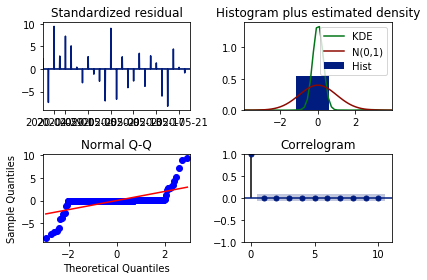

In [96]:
model = SARIMAX(np.log(Russia_quarantine_aug['Active Cases']), order = (1,1,0), trend = 'n')
result = model.fit()
print(result.summary())
result.plot_diagnostics()
plt.tight_layout()
plt.show()

In [97]:
forecast = result.get_prediction(start=-96,dynamic=True)
mean_forecast = np.exp(forecast.predicted_mean)
conf = np.exp(forecast.conf_int())
x = pd.DataFrame(mean_forecast)
y = pd.DataFrame(conf)
x = x.join(y)
x.columns = ['Prediction mean', 'Low limit', 'Up limit']
prediction = Russia_quarantine.join(x, how = 'inner')
prediction['Prediction mean'] = prediction['Prediction mean']
prediction['MAE'] = abs(prediction['Prediction mean']-prediction['Active Cases'])
prediction.describe()

,Cases,Deaths,Recovered,Active Cases,Infected,Prediction mean,Low limit,Up limit,MAE
count,4.000000,4.000000,4.000000,4.000000,0.0,4.000000,4.000000,4.000000,4.000000
mean,322147.250000,3177.000000,96458.500000,222511.750000,NaN,228464.254583,217977.220231,239642.706350,5952.504583
std,11675.213867,180.567627,9657.523438,1842.737427,NaN,3678.318300,3542.467779,11591.401111,1839.183215
min,308705.000000,2972.000000,85392.000000,220341.000000,NaN,224119.214007,213411.619937,226787.387776,3778.214007
25%,315341.750000,3067.250000,90858.750000,221415.750000,NaN,226364.428164,216178.947739,232607.784003,4948.678164
50%,322001.000000,3174.000000,96253.000000,222574.000000,NaN,228536.316464,218507.414724,239063.849744,5962.316464
75%,328806.500000,3283.750000,101852.750000,223670.000000,NaN,230636.142883,220305.687215,246098.772090,6966.142883
max,335882.000000,3388.000000,107936.000000,224558.000000,NaN,232665.171398,221482.431539,253655.738136,8107.171398


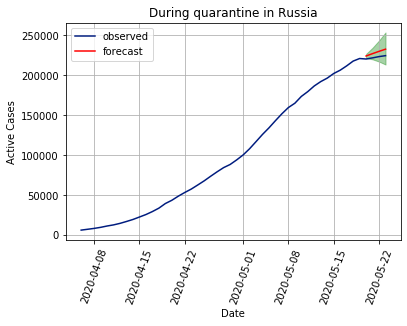

In [98]:
plt.plot(Russia_quarantine.index, Russia_quarantine['Active Cases'], label='observed')

# plot your mean forecast
plt.plot(prediction.index, prediction['Prediction mean'], color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(prediction.index, prediction['Low limit'], 
         prediction['Up limit'], color='green',alpha = .35)

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation = '70')
plt.grid()
plt.title('During quarantine in Russia')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:           Active Cases   No. Observations:                  624
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2555.059
Date:                Sun, 24 May 2020   AIC                           5114.117
Time:                        16:49:23   BIC                           5122.986
Sample:                    04-27-2020   HQIC                          5117.564
                         - 05-23-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9886      0.000   2031.647      0.000       0.988       0.990
sigma2       190.5900      1.873    101.779      0.000     186.920     194.260
Ljung-Box (Q):                       40.29   Jarque-

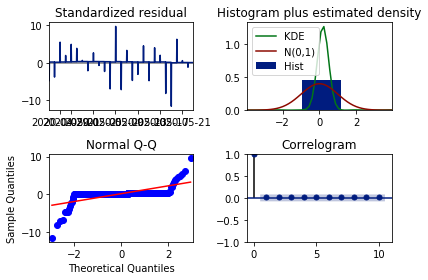

In [99]:
model = SARIMAX(Russia_quarantine_aug['Active Cases'], order = (1,1,0), trend = 'n')
result = model.fit()
print(result.summary())
result.plot_diagnostics()
plt.tight_layout()
plt.show()

In [100]:
forecast = result.get_prediction(start=-96,dynamic=True)
mean_forecast = forecast.predicted_mean
conf =forecast.conf_int()
x = pd.DataFrame(mean_forecast)
y = pd.DataFrame(conf)
x = x.join(y)
x.columns = ['Prediction mean', 'Low limit', 'Up limit']
prediction = Russia_quarantine.join(x, how = 'inner')
prediction['Prediction mean'] = prediction['Prediction mean']
prediction['MAE'] = abs(prediction['Prediction mean']-prediction['Active Cases'])
prediction.describe()

,Cases,Deaths,Recovered,Active Cases,Infected,Prediction mean,Low limit,Up limit,MAE
count,4.000000,4.000000,4.000000,4.000000,0.0,4.000000,4.000000,4.000000,4.000000
mean,322147.250000,3177.000000,96458.500000,222511.750000,NaN,226487.377895,220598.478983,232376.276807,3975.627895
std,11675.213867,180.567627,9657.523438,1842.737427,NaN,2148.450510,1579.517465,5805.419551,359.995791
min,308705.000000,2972.000000,85392.000000,220341.000000,NaN,223777.813095,218519.590261,225496.539461,3436.813095
25%,315341.750000,3067.250000,90858.750000,221415.750000,NaN,225373.649465,219825.037910,229066.238386,3957.899465
50%,322001.000000,3174.000000,96253.000000,222574.000000,NaN,226712.969620,220907.619471,232518.319769,4138.969620
75%,328806.500000,3283.750000,101852.750000,223670.000000,NaN,227826.698050,221681.060544,235828.358189,4156.698050
max,335882.000000,3388.000000,107936.000000,224558.000000,NaN,228745.759245,222059.086729,238971.928229,4187.759245


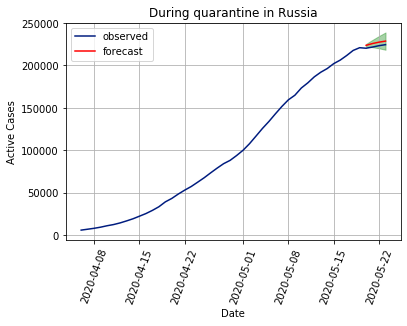

In [101]:
plt.plot(Russia_quarantine.index, Russia_quarantine['Active Cases'], label='observed')

# plot your mean forecast
plt.plot(prediction.index, prediction['Prediction mean'], color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(prediction.index, prediction['Low limit'], 
         prediction['Up limit'], color='green',alpha = .35)

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation = '70')
plt.grid()
plt.title('During quarantine in Russia')
plt.legend()
plt.show()

What do we have? Logarithmic solution didn’t converge with maximum likelihood function, simple differencing is a little bit overestimate the active cases, however, it seems that with the regular updates such model can be used as forecasting model for simulation of the active cases

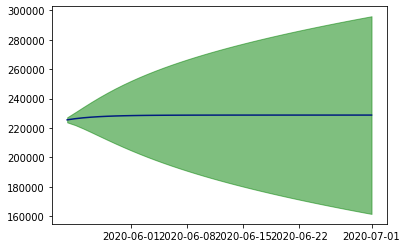

In [102]:
forecast = result.get_forecast(936)
forecast_df = pd.DataFrame(forecast.predicted_mean)
forecast_df['date'] = pd.to_datetime(forecast.predicted_mean.index)
forecast_df['date'] = forecast_df['date'].dt.floor('d')
forecast_df_grouped = forecast_df.groupby('date').min()
conf = pd.DataFrame(forecast.conf_int())
forecast_df_grouped = forecast_df_grouped.join(conf, how = 'inner')
forecast_df_grouped.columns = ['Forecast','Low limit','Up limit' ]
plt.plot(forecast_df_grouped.index,forecast_df_grouped['Forecast'])
plt.fill_between(forecast_df_grouped.index, forecast_df_grouped['Low limit'],forecast_df_grouped['Up limit'], alpha = .5, color = 'g')
plt.show()

In [103]:
x = forecast_df['2020-05-31':].iloc[:,0]

In [104]:
x = np.log(x)

In [105]:
risk = non_quarant.apply(x)

In [106]:
risky_forecast = risk.get_prediction(-553, dynamic=True)
risky_df = pd.DataFrame(risky_forecast.predicted_mean)
risky_df = risky_df.join(risky_forecast.conf_int())
risky_df.columns = ['Risky mean', 'Low limit dequarantine', 'Up limit dequarantine']
risky_df = risky_df.apply(np.exp)

In [107]:
risky_df

,Risky mean,Low limit dequarantine,Up limit dequarantine
2020-06-08 00:00:00,2.288567e+05,2.285798e+05,2.291340e+05
2020-06-08 01:00:00,2.290219e+05,2.284131e+05,2.296323e+05
2020-06-08 02:00:00,2.292644e+05,2.282619e+05,2.302714e+05
2020-06-08 03:00:00,2.295813e+05,2.281362e+05,2.310355e+05
2020-06-08 04:00:00,2.299697e+05,2.280422e+05,2.319135e+05
...,...,...,...
2020-06-30 20:00:00,2.261693e+07,1.177403e+07,4.344524e+07
2020-06-30 21:00:00,2.281523e+07,1.186974e+07,4.385394e+07
2020-06-30 22:00:00,2.301526e+07,1.196622e+07,4.426646e+07
2020-06-30 23:00:00,2.321705e+07,1.206350e+07,4.468283e+07


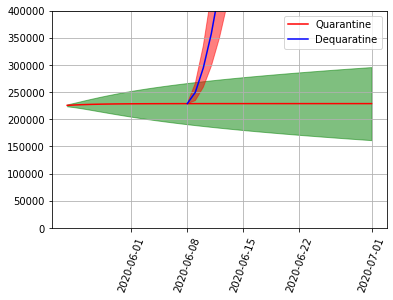

In [114]:
fig, ax = plt.subplots()
forecast = result.get_forecast(936)
forecast_df = pd.DataFrame(forecast.predicted_mean)
forecast_df['date'] = pd.to_datetime(forecast.predicted_mean.index)
forecast_df['date'] = forecast_df['date'].dt.floor('d')
forecast_df_grouped = forecast_df.groupby('date').min()
conf = pd.DataFrame(forecast.conf_int())
forecast_df_grouped = forecast_df_grouped.join(conf, how = 'inner')
forecast_df_grouped.columns = ['Forecast','Low limit','Up limit' ]
forecast_df_grouped = forecast_df_grouped.join(risky_df, how = 'left')
ax.plot(forecast_df_grouped.index,forecast_df_grouped['Forecast'], label = 'Quarantine', color = 'r')
ax.fill_between(forecast_df_grouped.index, forecast_df_grouped['Low limit'],forecast_df_grouped['Up limit'], alpha = .5, color = 'g')
ax.plot(forecast_df_grouped.index,forecast_df_grouped['Risky mean'], label = 'Dequaratine', color = 'b')
ax.fill_between(forecast_df_grouped.index,forecast_df_grouped['Low limit dequarantine'],
             forecast_df_grouped['Up limit dequarantine'], color = 'r', alpha = .5)
ax.tick_params(axis = 'x', rotation = 70)
ax.set_ylim(0,400000)
ax.grid()
ax.legend()
plt.show()

From this visualization we can see that the coming back to the speed of the spread of the virus after having so much infected people would be a disaster, even after the dequarantine in Russia people should keep social distance and telework as much as possible. And good news from this visualization Russia can converge to the certain number of active cases, which seems affordable from the previous analyses by Russian healthcare system .